In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)


In [4]:
#Preprocessing
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can['Total'] = df_can.sum(axis=1)

df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]].sort_values('Country') 
df_can.set_index('Country', inplace=True); df_can.head(3)

/var/folders/vx/h6y694195c58b8jxzjdg2j_00000gn/T/ipykernel_78131/1226954910.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [16]:
df_can.columns = list(map(str, df_can.columns))
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top_5 = df_can.head(5)


years = list(map(str, range(1980, 2014)))
df_top5 = df_can.sort_values(by = 'Total', ascending = False).head()[years].T

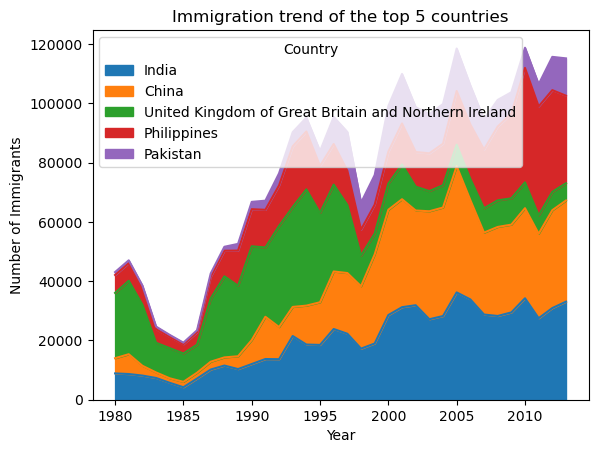

In [17]:
df_top5.plot(kind = 'area')

plt.title("Immigration trend of the top 5 countries")
plt.ylabel("Number of Immigrants")
plt.xlabel("Year")


plt.show()